# Evaluation Metrics - Classification

### Learning Objectives:
- [Evaluation metrics: why do we need them?](#Evaluation-metrics:-why-do-we-need-them?)
- [Classification Metrics](#Classification-Metrics)


## Introduction

> __Evaluation metrics__, as the name suggests, are metrics used to measure the performance of a model or algorithm. 

There are numerous evaluation metrics. Certain metrics can only be used for certain types of models, and different metrics can be used to evaluate different performance areas. 

Therefore, the optimal metric will vary depending on the following:
- the model.
- the data.
- the goal.

### Importance of metrics

The process of building models works on a constructive feedback principle. 

A model is built, feedback is obtained via metrics, improvements are made, and the cycle continues until the desired performance is achieved. 

By evaluating a model using multiple (appropriate) metrics, we can
- ensure that it is robust.
- tune it in multiple ways.

### The insufficiency of the loss

> The loss is rarely taken as the main metric in ML tasks.

Loss allows us to learn the things that we are really after and often works as a proxy for the real goal.

> Always evaluate the loss, but do not rely only on it.

Human assessment of performance is still required. Occasionally, the loss may be abruptly large, and yet the model will work great for the task (GANs are an example).

Other times, the loss may be minimal, but the model will not work as intended (reinforcement learning and wrong reward function).

## Classification Metrics

### Accuracy

In any classification problem, the goal is to predict the category of a given observation based on the general properties of a training dataset. 

In this context, the simplest way to measure performance, whether with binary or multiclass classification, is to measure the number of correct predictions out of the whole dataset.

> Accuracy is defined as the percentage of correct predictions out of all the predictions.


#### Example

Create an `accuracy` function that accepts the `reduction` function (set it to the default value, `= np.mean`) and apply it to `vector`, which is `labels` equal to `targets`:

In [2]:
import numpy as np


def accuracy(labels, targets, reduction=np.mean):
    return reduction(labels == targets)


targets = np.random.randint(0, 10, size=100)
labels = np.random.randint(0, 10, size=100)

accuracy(labels, targets)

0.1

#### Merits of accuracy

- The same estimation method can be employed for any classification task.
- The higher the accuracy, the better.

#### Demerits of accuracy

Accuracy, although helpful, is useless in some cases.

Consider a dataset with `10` positive labels and `90` negative labels. If we always predict the negative labels, we will achieve `90%` accuracy:

In [4]:
targets = np.concatenate((np.zeros(90), np.ones(10)))
predictions = np.zeros(100)

accuracy(predictions, targets)

0.9

This highlights the need to monitor other metrics as well.

### Confusion matrix

If there are two categories, and we consider one to be 'Positive' and the other to be 'Negative', we can derive the evaluation metrics that measure more specific aspects of performance by categorising the prediction outcome under the following four categories:

- __True positive:__ the model predicts the label to be 'Positive', and the true label is 'Positive'.
- __True negative:__ the model predicts the label to be 'Negative', and the true label is 'Negative'.
- __False positive:__ the model predicts the label to be 'Positive', and the true label is 'Negative'.
- __False negative:__ the model predicts the label to be 'Negative', and the true label is 'Positive'.

These outcomes can be displayed in a tabular form, in what is known as a __confusion matrix:__

<p align=center><img src=images/confusion-matrix.png width=600></p>

[Source](https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/)

> The values that go in each cell can either be the absolute frequency of that class (e.g. the actual number of false positives) or the normalised value (false positives in the `[0, 1]` range).

Conventionally, we go with the first case, although the second may be useful for comparing the proportions of each cell.

From this grouping of the possible outcomes of a binary prediction, we can come up with useful metrics. Let us start with the `true positive` calculation:

#### True positive

> A true positive for a binary case occurs when a model predicts `true` and the label is `true`.

*Example*

Code a `true_positive` function that accepts `predictions` and `targets` as arguments. 

- Use `astype(bool)` on `labels` and `targets`.
- Negate any of the `labels` / `targets` if needed.
- Return `np.sum` with `boolean` and (`&` for numpy).

In [3]:
# We assume they are binary
def true_positive(labels, targets):
    return np.sum(labels.astype(bool) & targets.astype(bool))

true_positive(predictions, targets)

0

#### True negative

> A true negative for a binary case occurs when a model predicts `false` and the label is `false`.

*Example*

Code a `true_negative` function that accepts `predictions` and `targets` as arguments. 

- Use `astype(bool)` on `labels` and `targets`.
- Negate any of the `labels` / `targets` if needed.
- Return `np.sum` with `boolean` and (`&` for numpy).

In [4]:
# We assume they are binary
def true_negative(labels, targets):
    return np.sum(~labels.astype(bool) & ~targets.astype(bool))

true_negative(predictions, targets)

90

#### False positive

> A false positive for a binary case occurs when a model predicts `true` and the label is `false`.

*Example*

Code a `false_positive` function that accepts `predictions` and `targets` as arguments. 

- Use `astype(bool)` on `labels` and `targets`.
- Negate any of the `labels` / `targets` if needed.
- Return `np.sum` with `boolean` and (`&` for numpy).

In [13]:
# We assume they are binary
def false_positive(labels, targets):
    return np.sum(~labels.astype(bool) & targets.astype(bool))

false_positive(predictions, targets)

10

#### False negative

> A false positive for a binary case occurs when a model predicts `false` and the label is `true`.

*Example*

Code a `false_negative` function that accepts `predictions` and `targets` as arguments. 

- Use `astype(bool)` on `labels` and `targets`.
- Negate any of the `labels` / `targets` if needed.
- Return `np.sum` with `boolean` and (`&` for numpy).

In [14]:
# We assume they are binary
def false_negative(labels, targets):
    return np.sum(labels.astype(bool) & ~targets.astype(bool))

false_negative(predictions, targets)

0

#### Visualising the confusion matrix

Given the above, we can use `sklearn` `plot_confusion_matrix` to easily view the confusion matrix for the `breast_cancer` dataset.

Split the dataset into `training` & `test` sets only. Fit on the training set, evaluate predictions on the tests, and plot.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
from sklearn.metrics import plot_confusion_matrix

# Loading the breast-cancer dataset
X, Y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.30, random_state=0
)

True Confusion Matrix:
Normalized Confusion Matrix:


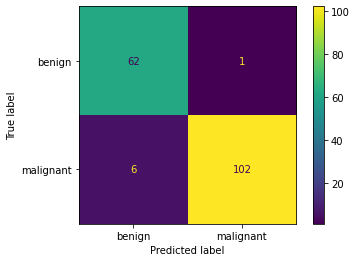

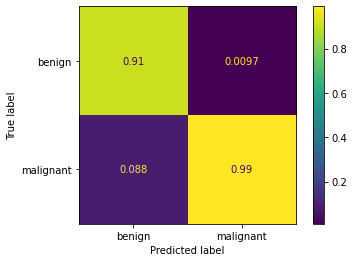

In [16]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Fitting the logistic-regression model to the data
myLogisticModel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = myLogisticModel.predict(X_test)

# Displaying the confusion matrix
print("True Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, display_labels=["benign", "malignant"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, normalize='pred', display_labels=["benign", "malignant"])

### Accuracy by the confusion matrix

Accuracy can be defined using the confusion matrix as well.

$$ 
\text{Acc} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

Let us use `sklearn` to calculate the accuracy metric and compare the result with our implementation result.

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy (our):", accuracy(Y_test, y_hat))
print("Accuracy (scikit-learn)", accuracy_score(Y_test, y_hat))

Accuracy (our): 0.9590643274853801
Accuracy (scikit-learn) 0.9590643274853801


According to our first evaluation metric, our model seems to exhibit good performance.

### Precision



__Precision__ is another commonly used evaluation metric.

> Precision is the ratio of correctly predicted positives to the total number of predicted positives.

$$ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

Precision is the answer to the question: 'When a model predicts TRUE, how often is it correct?'

In the breast-cancer context, precision answers the question: 'Of all the times we predicted a breast tumour to be malignant, how many times was it actually malignant?' 

It is an important measure for ensuring that the performance of a model is evaluated appropriately. 

For instance, if we are building a system to predict if we should decrease the credit limit on a particular account, we want to be confident in our prediction or it may result in customer dissatisfaction. In this context, precision is a very relevant measure of performance.



#### Thought experiment



Consider our current dataset, and assume that `560` of the patients have a benign tumour, while 9 patients have a malignant tumour. 

If we create a model that always predicts the tumour to be benign (negative), we obtain the following:
- An accuracy of $\frac{560}{569} = 98.4\%$, which suggests that our model performed well. We know that the model design is poor, which once again reflects the fact that accuracy is a poor metric in the case of a non-symmetric data distribution. Regarding the precision, since we have no true positives or false positives, the precision is undefined (equation divided by zero), which highlights the poor performance of the model. 

__Similar to the case with accuracy, we want the precision to be as close to 1 as possible.__

Below, we compute the precision of our model using `numpy` and the in-built function in scikit-learn. 


#### Example


Code a `precision` function that accepts `labels and predictions` as arguments (remember to cache the `true_positive` value to avoid repeating the calculations).

In [18]:
from sklearn.metrics import precision_score
# Computing precision
def precision(labels, predictions):
    tp = true_positive(labels, predictions)
    return tp / (tp + false_positive(labels, predictions))

print("Precision (Python):", precision(Y_test, y_hat))
print("Precision (scikit-learn)", precision_score(Y_test, y_hat))

Precision (Python): 0.9902912621359223
Precision (scikit-learn) 0.9902912621359223


### Recall

Another useful evaluation metric for classification models is __recall__, also known as __sensitivity__. 

> Recall is the ratio of the correctly predicted positives to the total number of positives in the dataset. It is given by the following equation:

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

> Perfect recall occurs when there are no false negatives; thus, it is a useful metric to consider when false negatives are costly.

Recall is the answer to the question: 'What proportion of the true labelled examples does the model correctly predict?'

In the breast-cancer context, precision answers the question: 'Of all the people who had a malignant breast tumour, how many did the model correctly identify?'

While precision measures how well a model deals with false positives, recall measures how well it deals with false negatives. 

> Combined, accuracy, recall and precision are robust metrics for performance evaluation. 

Recall is a useful measure to consider when false negatives are more costly than false positives. For instance, it is probably better that a tumour is classified as malignant even though it is not, as it will lead to further examination, than if a malignant tumour were classified as benign, leading to inappropriate or no medical intervention.

#### Thought experiment

Consider the same extreme example from earlier with 560 benign tumours and 9 malignant tumours. 

If we create a model that always predicts the tumour to be malignant (positive), we will obtain the following results: 
- The accuracy will be $\frac{9}{569} = 2\%$.
- The precision will be $\frac{9}{569} = 2\%$.
- The recall will be $\frac{9}{9} =100\%$. 

In the previous thought experiment, going with only accuracy would have led us to misjudge the model's performance, just as now using only recall would have the same effect.

#### Example

Code a `recall` function that accepts `labels and predictions` as arguments (remember to cache the `true_positive` value to avoid repeating the calculations).

In [19]:
from sklearn.metrics import recall_score

def recall(labels, predictions):
    tp = true_positive(labels, predictions)
    return tp / (tp + false_negative(labels, predictions))

print("Recall (Python):", recall(Y_test, y_hat))
print("Recall (scikit-learn)", recall_score(Y_test, y_hat))

Recall (Python): 0.9444444444444444
Recall (scikit-learn) 0.9444444444444444


Once again, the results reflect that our model exhibits a strong performance. Using recall and precision in parallel is already a strong strategy for evaluating the performance of models. 

> However, as they are two separate measures, we cannot use them directly to compare the performance of one model with another.

Therefore, instead, we must come up with a metric that accounts for both the recall __and__ the precision of our model simultaneously. To do that, we will introduce a new metric called the F1 score.

### Summary

<p align=center><img src=images/precision-recall-side-by-side.png width=600></p>

<p align=center><img src=images/precision_recall.png width=500></p>

[Source](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

### F1 score

The $\mathbf{F_{1}}$ __score__, also known as the __F-score__ or __F-measure,__ is a metric that takes the harmonic mean of the precision and recall. 

Therefore, by maximising the F1 score, we can account for both the precision and the recall simultaneously. It is given as follows:

$$
F_{1} = 2\cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision + recall}} = 
\frac{\text{TP}}{\text{TP} + \frac{1}{2}(\text{FP} + \text{FN})}
$$

This metric enables the robust evaluation of the performance of models. It affords insights into the lacking areas and the performances of specific models relative to others. An extension of the $F_{1}$ score is known as the $F_{\beta}$ score; for a given value, the $\beta$ is given as follows:

$$
F_{\beta} = (1+\beta^{2})\frac{\text{precision} \cdot \text{recall}}{(\beta^{2}\cdot\text{precision) + recall}}
$$

While we will not implement this version of the metric in this course, it can be useful as it enables you to assign different weightings to the two metrics depending on the chosen parameter value for $\beta$. 

Depending on the context under which the model is applied, you will need to optimise for different metrics, e.g. when aiming to diagnose whether a breast tumour is malignant (positive) or benign (negative).

It is much better to misdiagnose it as malignant (`False Positive`), which would result in further testing, than to misdiagnose it as benign (`False Negative`), which would result in inappropriate or no medical intervention. In this context, you would choose to minimise the number of false negatives, thereby assigning a higher weighting to the recall than the precision.

Below, we implement the $F_{1}$ score with Python as well as with the in-built scikit-learn function.

#### Example

Code an `f1` function that accepts `labels and predictions` as arguments (remember to cache the `precision` and `recall`).

In [21]:
from sklearn.metrics import f1_score

# Computing the F1 score
def f1(labels, predictions):
    p = precision(labels, predictions)
    r = recall(labels, predictions)
    return 2 * (p*r) / (p+r)

print("F1 score (Python):", f1(Y_test, y_hat))
print("F1 score (scikit-learn)", f1_score(Y_test, y_hat))

F1 score (Python): 0.966824644549763
F1 score (scikit-learn) 0.966824644549763


Our model exhibits a relatively high performance across all the four different metrics used thus far, which reflects its robustness.

Next, we provide an answer to the question: 'How does any of this apply to the multiclass classification case?' The same framework, as seen above, can also be applied to non-binary cases. We will demonstrate this using the iris dataset from scikit-learn, which we upload below and fit to a multiclass logistic-regression model.

In [22]:
from sklearn.datasets import load_iris

# Loading the iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.30, random_state=0
)

In [24]:
# Fitting a logistic-regression model to the iris dataset
model = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = model.predict(X_test)

As the first step, we need to expand upon the confusion matrix so that it accounts for multiple classes rather than two. 

> We do this by treating each class as a simple case of binary classification.

Fortunately, the in-built tools in scikit-learn allow us to plot the confusion matrix of the iris dataset and the corresponding model.

Confusion matrix
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


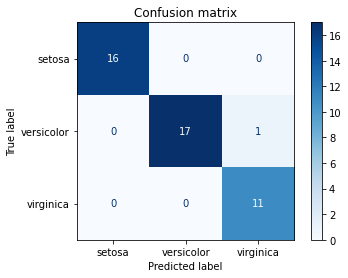

In [25]:
# Visualisation of the confusion matrix of the iris dataset
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = iris.target_names

title = "Confusion matrix"
disp = plot_confusion_matrix(
    model, X_test, Y_test, display_labels=class_names, cmap=plt.cm.Blues
)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

Now, with the confusion matrix as a visual aid, we can __'binarise'__ the problem and treat each class as a binary-classification problem. For instance, we can compute the precision when classifying an observation as 'versicolor' or not as $\frac{17}{17} = 100\%$, to be $\frac{16}{16} = 100\%$ and $\frac{11}{11 + 1} = 91.7\%$ for 'setosa' and 'virgina', respectively. 

Using these three metrics, we can compute the average of the individual precisions to obtain the precision of the multiclassification model. Furthermore, we can generalise this concept and apply it to the other metrics discussed. This is the simplest form of computing the multiclass precision and is known as __macro averaging,__ where all metrics have the same weight. For information on other forms of metric averaging, see [here](https://scikit-learn.org/stable/modules/model_evaluation.html). If we consider a multiclassification model with $N$ possible classes,

$$\text{Accuracy} = \frac{\text{correct predictions}}{\text{all predictions}}$$,

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} $$,

$$\text{Recall} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Recall})_{i} $$.

The $F_{1}$ score metric can still be computed in terms of the recall and precision. Below, we compute the four metrics encountered for the 'irisLogisticModel'. To prevent this from becoming a 'black-box' concept and aid your understanding, we have computed, by hand, the precision of our model based on the values on the confusion matrix.

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} = \frac{1 + 1 + 0.917}{3} = 0.972 $$

> In `sklearn`, multiclass and binary metrics work as a single function/class.

In [27]:
print("Accuracy:", accuracy_score(Y_test, y_hat))
print("Precision:", precision_score(Y_test, y_hat, average="macro"))
print("Recall:", recall_score(Y_test, y_hat, average="macro"))
print("F1 score:", f1_score(Y_test, y_hat, average="macro"))

Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815
F1 score: 0.975983436853002


# Extra: ROC & AUC

Next, we discuss one of the most powerful evaluation metrics used in classification: the __ROC curve__ and the __AUC.__

By 'fitting' a logistic-regression model to our binary classification data, we have already found the optimal __threshold__ for the model. 

> Furthering the breast-cancer context, the threshold is the probability, above which the tumour can be considered malignant, and below which the tumour can be considered benign.

However, the 'optimal' threshold may not necessarily give the optimal model for the problem being addressed, which is the primary purpose of evaluation metrics. 

As a solution, we present the ROC curve, which was originally developed for operators of military radar receivers, hence the name. It provides a visual representation of the model's performance while operating at different thresholds.

The ROC curve uses __recall__, referred to in this context as __sensitivity__ or __true positive rate__, as well as __specificity,__ which is the ratio of the number of observations that were correctly predicted negative to the number of observations that were actually negative:

$$ 
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

Given this quantity, we can define the __false positive rate__, which informs on the proportion of observations that were predicted to be malignant when they were actually benign:

$$ 
\text{FPR} = 1-\text{Specificity} = \frac{\text{FP}}{\text{TN} + \text{FP}}
$$

Using these quantities, we can plot a ROC curve for our binary classification model, which is the true positive rate versus the false positive rate for all the threshold values tested.

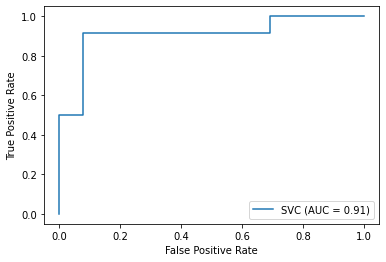

In [41]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0
)

clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

The values for FPR and TPR are taken at different thresholds and computed as points.

Additionally, we can observe the __AUC__:

> AUC is a measure of the area under the rectangle.

Intuitively, __the larger the area under the rectangle, the more favourable the result.

This value allows us to easily compare models, with the maximum value being `1.0`.

## Conclusion
At this point, you should have a good understanding of the following:

- [Evaluation metrics](#Evaluation-metrics:-why-do-we-need-them?)
- [Classification metrics](#Classification-Metrics)
- [Regression metrics](#Regression-Metrics)
- [Extra: ROC & AUC](#Extra:-ROC-&-AUC)